# Computing water masses

## Loading the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.3 Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor



from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Loading the data

We load the file.

In [2]:
df = pd.read_csv('AtlanticOceanDatabase_clean.csv',delimiter=';',decimal=',')

In [3]:
df

,LATITUDE,LONGITUDE,CTDPRS,CTDTPOT,CTDSAL,EDW,ENACW12,WNACW7,SPMW,SACWT12,SACWE12,WW,AAIW5,AAIW3,MW,LSW,ISOW,DSOW,CDW,WSDW
0,39.8966,-69.9309,252.7,9.564524,35.2279,0.239721,0.0,0.026235,0.0,0.0,0.0,0.000000,0.524896,0.000000,0.209147,0.000000,0.000000,0.0,0.000000,0.000000
1,39.8966,-69.9309,303.1,8.496589,35.1472,0.102762,0.0,0.009145,0.0,0.0,0.0,0.000000,0.565819,0.000000,0.322275,0.000000,0.000000,0.0,0.000000,0.000000
2,39.8966,-69.9309,353.3,7.393557,35.0895,0.000000,0.0,0.007423,0.0,0.0,0.0,0.000000,0.529950,0.000000,0.381374,0.081268,0.000000,0.0,0.000000,0.000000
3,39.8966,-69.9309,403.9,6.440269,35.0392,0.000000,0.0,0.005932,0.0,0.0,0.0,0.000000,0.415799,0.000000,0.301469,0.276812,0.000000,0.0,0.000000,0.000000
4,39.8966,-69.9309,454.7,6.023806,35.0184,0.000000,0.0,0.005145,0.0,0.0,0.0,0.000000,0.365740,0.000000,0.266598,0.362528,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11240,-60.0130,-30.8953,1697.8,-0.016404,34.6681,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.061908,0.0,0.058513,0.879582
11241,-60.0130,-30.8953,1996.5,-0.119847,34.6641,0.000000,0.0,0.000000,0.0,0.0,0.0,0.001936,0.000000,0.000000,0.000000,0.000000,0.059451,0.0,0.015647,0.922979
11242,-60.0130,-30.8953,2299.0,-0.180780,34.6618,0.000000,0.0,0.000000,0.0,0.0,0.0,0.026987,0.000000,0.000092,0.000000,0.000000,0.012367,0.0,0.069732,0.890818
11243,-60.0130,-30.8953,2597.7,-0.218909,34.6601,0.000000,0.0,0.000000,0.0,0.0,0.0,0.029614,0.000000,0.000496,0.000000,0.000000,0.004366,0.0,0.059543,0.905973


We group the dataset by latitude and longitude, and generate a training and testing set such that any location that appears in the testing set does not appear in the training set and viceversa. These datasets have been saved in two files called train and test for later use.

In [4]:
gr = df.groupby(['LATITUDE','LONGITUDE'])
gr2 = [gr.get_group(x) for x in gr.groups]
import random
random.seed=15
trainingElems = random.sample(range(0,len(gr2)),int(len(gr2)*0.8))
trainingGrps = [gr2[i] for i in trainingElems]
testingGrps = [gr2[i] for i in range(0,len(gr2)) if i not in trainingElems]
trainingdf = pd.concat(trainingGrps)
testingdf = pd.concat(testingGrps)
trainingdf.to_csv('train.csv')
testingdf.to_csv('test.csv')

In [4]:
trainingdf = pd.read_csv('train.csv')
testingdf = pd.read_csv('test.csv')

In [5]:
len(trainingdf)

9011

In [6]:
len(testingdf)

2234

We obtain the samples and their annotations.

In [6]:
Xtrain,ytrain = trainingdf.values[:,0:5],trainingdf.values[:,5:-3]
Xtest,ytest = testingdf.values[:,0:5],testingdf.values[:,5:-3]

## Linear regression

The first model that we try is a linear regressor. 

In [7]:
regr_linear = LinearRegression()
regr_linear.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We evaluate the model using the coefficient of determination R^2 of the prediction (best possible value equals to 1.0) and obtain a value of 0.51. 

In [8]:
regr_linear.score(Xtest,ytest)

0.5166681434803346

The mean squared error is quite high too.

In [9]:
mean_squared_error(ytest, regr_linear.predict(Xtest))

0.010620055322194916

Let us try a more complex model; namely, a extremely randomized forest. 

## ExtraTrees forest

In [10]:
regr_et = ExtraTreesRegressor(n_estimators=100, max_depth=30,
                                random_state=2)
regr_et.fit(Xtrain, ytrain)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=30,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
          oob_score=False, random_state=2, verbose=0, warm_start=False)

In [11]:
regr_et.score(Xtest,ytest)

0.9869016685386148

In [12]:
mean_squared_error(ytest, regr_et.predict(Xtest))

0.00028780433747944945

Saving the model

In [13]:
from joblib import dump

In [14]:
dump(regr_et, 'model_regr_et.joblib') 

['model_regr_et.joblib']

Let us check the importance of each feature for the random forest. 

In [13]:
relevances = regr_et.feature_importances_
indexes = np.argsort(relevances)[::-1]

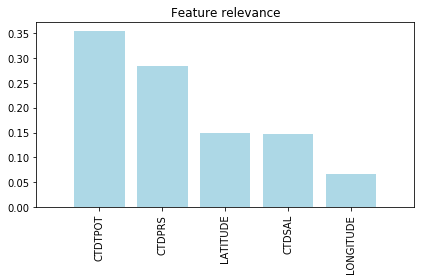

In [14]:
plt.title('Feature relevance')
plt.bar(range(Xtrain.shape[1]),relevances[indexes],color='lightblue',align='center')
plt.xticks(range(Xtrain.shape[1]),df.columns[0:5][indexes],rotation=90)
plt.xlim([-1,Xtrain.shape[1]])
plt.tight_layout()
plt.show()

In [15]:
regr_et.predict([Xtest[0]])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02151037, 0.00814621, 0.19070153, 0.        ,
        0.06743477, 0.00145126, 0.        , 0.70744268, 0.0033271 ]])

In [16]:
ytest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.22841746, 0.        ,
       0.07304901, 0.        , 0.        , 0.69865354, 0.        ])

## Random forest

In [17]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=30,
                                random_state=2)
regr_rf.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [18]:
regr_rf.score(Xtest,ytest)

0.9794503313354641

In [19]:
mean_squared_error(ytest, regr_rf.predict(Xtest))

0.00045152955495550954

Let us check the importance of each feature for the random forest. 

In [20]:
relevances = regr_rf.feature_importances_
indexes = np.argsort(relevances)[::-1]

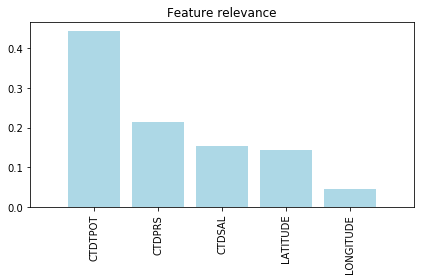

In [21]:
plt.title('Feature relevance')
plt.bar(range(Xtrain.shape[1]),relevances[indexes],color='lightblue',align='center')
plt.xticks(range(Xtrain.shape[1]),df.columns[0:5][indexes],rotation=90)
plt.xlim([-1,Xtrain.shape[1]])
plt.tight_layout()
plt.show()

In [22]:
regr_rf.predict([Xtest[0]])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.66235705e-02, 7.29537298e-03,
        1.98179521e-01, 5.38000000e-07, 5.50898878e-02, 0.00000000e+00,
        0.00000000e+00, 7.22770648e-01, 5.02462718e-05]])

In [23]:
ytest[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.22841746, 0.        ,
       0.07304901, 0.        , 0.        , 0.69865354, 0.        ])

## We try other models

In [24]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, max_depth=30, random_state=2),
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, max_depth=30, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
}

In [25]:
for name, estimator in ESTIMATORS.items():     
    estimator.fit(Xtrain, ytrain)  
    print("%s. mse: %f, score: %f" % (name,mean_squared_error(ytest, estimator.predict(Xtest)),
                                      estimator.score(Xtest,ytest)))

/home/jonathan/.virtualenvs/cv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Extra trees. mse: 0.000335, score: 0.984743
K-nn. mse: 0.002603, score: 0.881520
Linear regression. mse: 0.010620, score: 0.516668
Ridge. mse: 0.010620, score: 0.516671
Lasso. mse: 0.015900, score: 0.276375
ElasticNet. mse: 0.015477, score: 0.295620
RandomForestRegressor. mse: 0.000452, score: 0.979450
ExtraTreesRegressor. mse: 0.000288, score: 0.986902
Decision Tree Regressor. mse: 0.005178, score: 0.764324
MultiO/P GBR. mse: 0.009717, score: 0.481618
MultiO/P AdaB. mse: 0.002412, score: 0.764847
